In [2]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime

from sklearn import linear_model
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
train = pd.read_csv('dataset_uci/train.csv')
test = pd.read_csv('dataset_uci/test.csv')
print(train.shape, test.shape)

(4252, 564) (1492, 564)


In [4]:
train.head(2)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
0,2.25890,-0.022376,-0.65151,0.28483,-0.31966,0.059275,0.28214,-0.38569,0.036359,1.29060,...,-0.97427,0.46312,-0.53861,-0.39732,-0.62225,0.089781,0.29091,1,1,WALKING
1,0.29285,-0.018404,-0.17848,-0.47754,-0.44896,-0.241460,-0.52517,-0.48042,-0.248240,-0.06169,...,-0.33814,0.93831,-0.60066,0.49436,-0.59451,0.097650,0.31090,1,1,WALKING


In [5]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.ActivityName

X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.ActivityName

print('X_train and y_train : ({},{})'.format(X_train.shape, y_train.shape))
print('X_test  and y_test  : ({},{})'.format(X_test.shape, y_test.shape))

X_train and y_train : ((4252, 561),(4252,))
X_test  and y_test  : ((1492, 561),(1492,))


In [6]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

Training the model...
Fitting 3 folds for each of 12 candidates, totalling 36 fits


/Users/mishkasingh/Desktop/IITG/ML/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mishkasingh/Desktop/IITG/ML/my_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

==> Training time: 0:00:04.015975

Predicting test data...
==> Testing time: 0:00:00.002523

==> Accuracy: 0.8485254691689008


******** Confusion Matrix ********
[[232   3   0   0   0   3]
 [  1 227  60   0   0   1]
 [  0  40 212   1   0   1]
 [  0   0   0 209  18  16]
 [  6   2   3  11 195  22]
 [  3   1   7   9  18 191]]


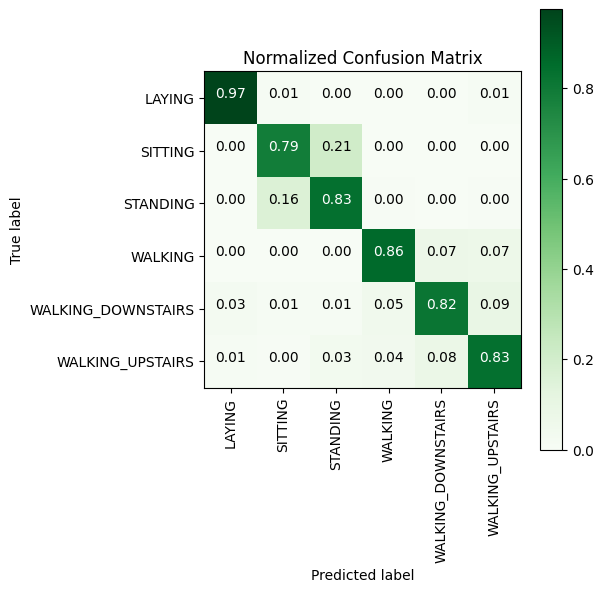

****************| Classification Report |****************
                    precision    recall  f1-score   support

            LAYING       0.96      0.97      0.97       238
           SITTING       0.83      0.79      0.81       289
          STANDING       0.75      0.83      0.79       254
           WALKING       0.91      0.86      0.88       243
WALKING_DOWNSTAIRS       0.84      0.82      0.83       239
  WALKING_UPSTAIRS       0.82      0.83      0.83       229

          accuracy                           0.85      1492
         macro avg       0.85      0.85      0.85      1492
      weighted avg       0.85      0.85      0.85      1492



==> Best Estimator:
	LogisticRegression(C=0.23)


==> Best Parameters:
	Parameters of best estimator: {'C': 0.23, 'penalty': 'l2'}

==> No. of CrossValidation sets:
	Total number of cross-validation sets: 3

==> Best Score:
	Average Cross Validate scores of best estimator: 0.743666386968104


In [7]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import metrics, linear_model
from sklearn.model_selection import GridSearchCV
from datetime import datetime
import warnings
from sklearn.exceptions import ConvergenceWarning

plt.rcParams["font.family"] = 'DejaVu Sans'

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Function to train and evaluate the model
def perform_model(model, X_train, y_train, X_test, y_test, class_labels, cm_normalize=True, print_cm=True, cm_cmap=plt.cm.Greens):
    results = {}

    # Training the model
    train_start_time = datetime.now()
    print('Training the model...')
    model.fit(X_train, y_train)
    train_end_time = datetime.now()
    results['training_time'] = train_end_time - train_start_time
    print(f'==> Training time: {results["training_time"]}\n')

    # Predicting test data
    print('Predicting test data...')
    test_start_time = datetime.now()
    y_pred = model.predict(X_test)
    test_end_time = datetime.now()
    results['testing_time'] = test_end_time - test_start_time
    print(f'==> Testing time: {results["testing_time"]}\n')
    results['predicted'] = y_pred

    # Accuracy
    accuracy = metrics.accuracy_score(y_test, y_pred)
    results['accuracy'] = accuracy
    print(f'==> Accuracy: {accuracy}\n')

    # Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print('\n******** Confusion Matrix ********')
        print(cm)

    # Plot Confusion Matrix
    plt.figure(figsize=(6,6))
    plt.grid(False)  # ✅ Corrected grid argument
    plot_confusion_matrix(cm, classes=class_labels, normalize=True, title='Normalized Confusion Matrix', cmap=cm_cmap)
    plt.show()

    # Classification Report
    print('****************| Classification Report |****************')
    classification_report = metrics.classification_report(y_test, y_pred)
    results['classification_report'] = classification_report
    print(classification_report)

    # Save trained model
    results['model'] = model
    return results

# Function to print GridSearchCV attributes
def print_grid_search_attributes(model):
    print('\n\n==> Best Estimator:')
    print(f'\t{model.best_estimator_}\n')

    print('\n==> Best Parameters:')
    print(f'\tParameters of best estimator: {model.best_params_}')

    print('\n==> No. of CrossValidation sets:')
    print(f'\tTotal number of cross-validation sets: {model.n_splits_}')

    print('\n==> Best Score:')
    print(f'\tAverage Cross Validate scores of best estimator: {model.best_score_}')

# Ignore warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

# Ensure data is defined before training
# X_train, X_test, y_train, y_test, labels should be properly initialized

# Start Grid Search
parameters = {'C': [0.01, 0.1, 0.23, 10, 20, 30], 'penalty': ['l2', 'l1']}
log_reg = linear_model.LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, param_grid=parameters, cv=3, verbose=1, n_jobs=-1)
log_reg_grid_results = perform_model(log_reg_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# Print model attributes
print_grid_search_attributes(log_reg_grid_results['model'])


Training the model...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/Users/mishkasingh/Desktop/IITG/ML/my_env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mishkasingh/Desktop/IITG/ML/my_env/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


==> Training time: 0:00:48.050828

Predicting test data...
==> Testing time: 0:00:00.003239

==> Accuracy: 0.8572386058981233


******** Confusion Matrix ********
[[233   2   0   0   0   3]
 [  1 236  52   0   0   0]
 [  0  33 219   2   0   0]
 [  0   0   0 210  13  20]
 [  6   2   2  10 196  23]
 [  2   3   7   8  24 185]]


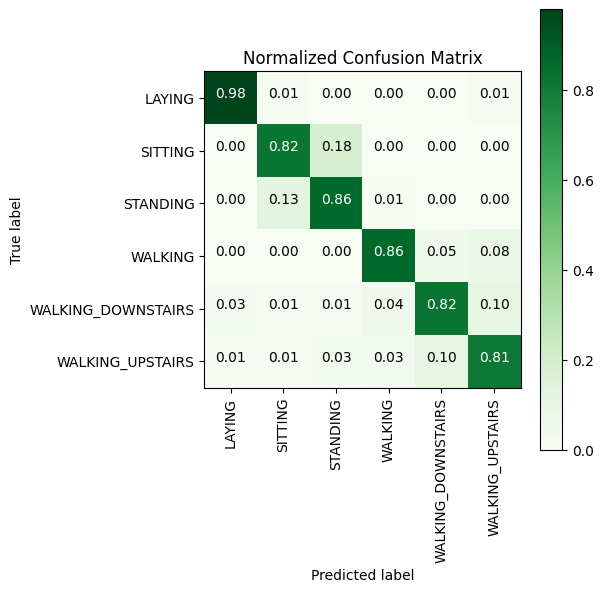

****************| Classification Report |****************
                    precision    recall  f1-score   support

            LAYING       0.96      0.98      0.97       238
           SITTING       0.86      0.82      0.84       289
          STANDING       0.78      0.86      0.82       254
           WALKING       0.91      0.86      0.89       243
WALKING_DOWNSTAIRS       0.84      0.82      0.83       239
  WALKING_UPSTAIRS       0.80      0.81      0.80       229

          accuracy                           0.86      1492
         macro avg       0.86      0.86      0.86      1492
      weighted avg       0.86      0.86      0.86      1492



==> Best Estimator:
	LinearSVC(C=0.125, tol=5e-05)


==> Best Parameters:
	Parameters of best estimator: {'C': 0.125}

==> No. of CrossValidation sets:
	Total number of cross-validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator: 0.7789532038432295


In [8]:
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(lr_svc_grid_results['model'])

Training the model...
==> Training time: 0:00:42.968593

Predicting test data...
==> Testing time: 0:00:00.583103

==> Accuracy: 0.8739946380697051


******** Confusion Matrix ********
[[236   0   0   0   1   1]
 [  1 239  49   0   0   0]
 [  1  22 231   0   0   0]
 [  0   0   0 211  12  20]
 [  2   4   3  14 201  15]
 [  3   0   5  13  22 186]]


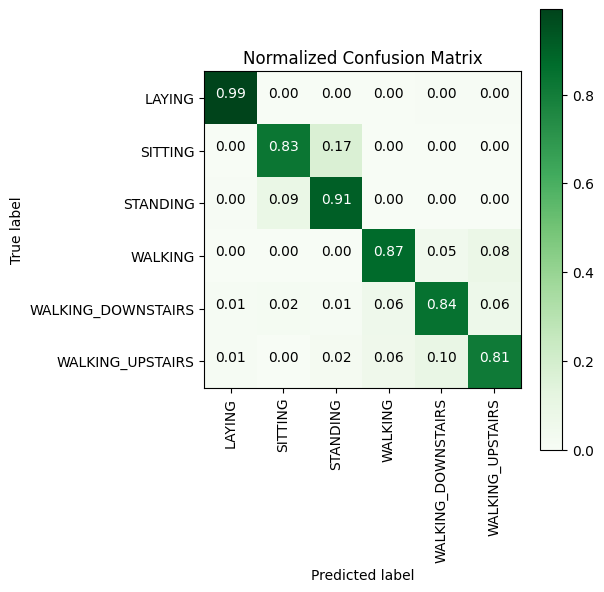

****************| Classification Report |****************
                    precision    recall  f1-score   support

            LAYING       0.97      0.99      0.98       238
           SITTING       0.90      0.83      0.86       289
          STANDING       0.80      0.91      0.85       254
           WALKING       0.89      0.87      0.88       243
WALKING_DOWNSTAIRS       0.85      0.84      0.85       239
  WALKING_UPSTAIRS       0.84      0.81      0.82       229

          accuracy                           0.87      1492
         macro avg       0.88      0.87      0.87      1492
      weighted avg       0.88      0.87      0.87      1492



==> Best Estimator:
	SVC(C=8, gamma=0.0078125)


==> Best Parameters:
	Parameters of best estimator: {'C': 8, 'gamma': 0.0078125}

==> No. of CrossValidation sets:
	Total number of cross-validation sets: 5

==> Best Score:
	Average Cross Validate scores of best estimator: 0.7843544618787586


In [9]:
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rbf_svm_grid_results['model'])


Training the model...
==> Training time: 0:02:37.339902

Predicting test data...
==> Testing time: 0:00:00.020556

==> Accuracy: 0.8840482573726541


******** Confusion Matrix ********
[[233   2   0   0   0   3]
 [  0 240  49   0   0   0]
 [  0  15 239   0   0   0]
 [  0   0   0 220   6  17]
 [  1   4   1  16 199  18]
 [  2   1   3  23  12 188]]


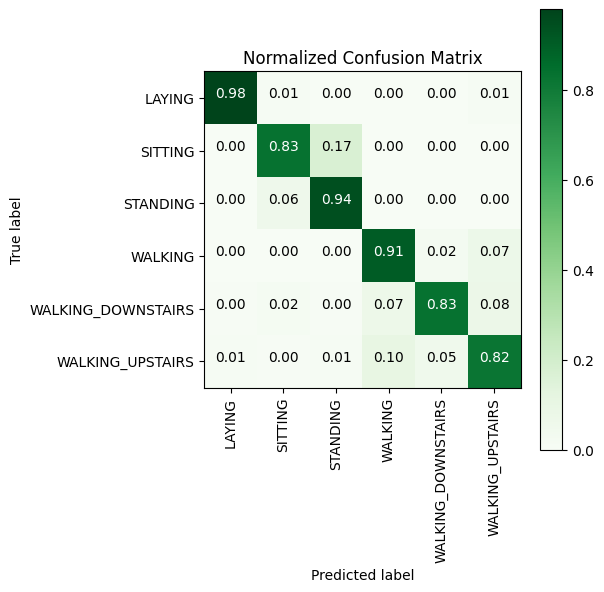

****************| Classification Report |****************
                    precision    recall  f1-score   support

            LAYING       0.99      0.98      0.98       238
           SITTING       0.92      0.83      0.87       289
          STANDING       0.82      0.94      0.88       254
           WALKING       0.85      0.91      0.88       243
WALKING_DOWNSTAIRS       0.92      0.83      0.87       239
  WALKING_UPSTAIRS       0.83      0.82      0.83       229

          accuracy                           0.88      1492
         macro avg       0.89      0.88      0.88      1492
      weighted avg       0.89      0.88      0.88      1492



==> Best Estimator:
	RandomForestClassifier(max_depth=np.int64(13), n_estimators=np.int64(150))


==> Best Parameters:
	Parameters of best estimator: {'max_depth': np.int64(13), 'n_estimators': np.int64(150)}

==> No. of CrossValidation sets:
	Total number of cross-validation sets: 5

==> Best Score:
	Average Cross Validate scores of b

In [11]:
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, X_train, y_train, X_test, y_test, class_labels=labels)

# observe the attributes of the model 
print_grid_search_attributes(rfc_grid_results['model'])

In [70]:
# ***************************** Print Accuracy and Error ******************************

print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC :          {:.04}%       {:.04}%'.format( lr_svc_grid_results['accuracy'] * 100,\
                                             100 - (lr_svc_grid_results['accuracy'] * 100) ))


print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))


                     Accuracy     Error
                     ----------   --------
Logistic Regression : 84.85%       15.15%
Linear SVC : 85.72% 14.28%
rbf SVM classifier  : 87.4%      12.6% 
Random Forest       : 88.4%      11.6% 
